## Generate Random World Cities

## Import Dependancies & Initialize Lists and Counters 

In [1]:
# Import dependancies 
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

## Create City List based on random Lat/Lon

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

lat_lngs

In [3]:
# Unpack the lat_lng zip into a list 
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

610

## Build API Call URL with API key

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

## Loop through city list & build City URL 

In [6]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [7]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
 

    # Create endpoint URL with each city.
    # remove blank spaces - these will cause an error
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | victoria
Processing Record 2 of Set 1 | amderma
City not found. Skipping...
Processing Record 3 of Set 1 | ostrovnoy
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | qaanaaq
Processing Record 6 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 7 of Set 1 | nuevo progreso
Processing Record 8 of Set 1 | kihei
Processing Record 9 of Set 1 | maunabo
Processing Record 10 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 11 of Set 1 | troy
Processing Record 12 of Set 1 | chokurdakh
Processing Record 13 of Set 1 | esna
Processing Record 14 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | bluff
Processing Record 17 of Set 1 | zhigansk
Processing Record 18 of Set 1 | itarema
Processing Record 19 of Set 1 | ixtapa
Processing Record 20 of Set 1 | coquimbo
Processing Record 21 

Processing Record 35 of Set 4 | leghorn
City not found. Skipping...
Processing Record 36 of Set 4 | hyeres
Processing Record 37 of Set 4 | awjilah
Processing Record 38 of Set 4 | kemijarvi
Processing Record 39 of Set 4 | nowy dwor gdanski
Processing Record 40 of Set 4 | pitmoaga
Processing Record 41 of Set 4 | rafraf
Processing Record 42 of Set 4 | tiksi
Processing Record 43 of Set 4 | dikson
Processing Record 44 of Set 4 | pevek
Processing Record 45 of Set 4 | omsukchan
Processing Record 46 of Set 4 | lahaina
Processing Record 47 of Set 4 | port hardy
Processing Record 48 of Set 4 | anar darreh
City not found. Skipping...
Processing Record 49 of Set 4 | maniitsoq
Processing Record 50 of Set 4 | maumere
Processing Record 1 of Set 5 | vila franca do campo
Processing Record 2 of Set 5 | marcona
City not found. Skipping...
Processing Record 3 of Set 5 | kerteh
City not found. Skipping...
Processing Record 4 of Set 5 | mareeba
Processing Record 5 of Set 5 | sakakah
Processing Record 6 of S

Processing Record 20 of Set 8 | payo
Processing Record 21 of Set 8 | tadine
Processing Record 22 of Set 8 | vostok
Processing Record 23 of Set 8 | ustka
Processing Record 24 of Set 8 | iglesias
Processing Record 25 of Set 8 | kutum
Processing Record 26 of Set 8 | kloulklubed
Processing Record 27 of Set 8 | gemena
Processing Record 28 of Set 8 | marbella
Processing Record 29 of Set 8 | kavaratti
Processing Record 30 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 31 of Set 8 | neiafu
Processing Record 32 of Set 8 | arkhangelsk
Processing Record 33 of Set 8 | port hueneme
Processing Record 34 of Set 8 | mago
Processing Record 35 of Set 8 | wamba
Processing Record 36 of Set 8 | ismailia
Processing Record 37 of Set 8 | saint-francois
Processing Record 38 of Set 8 | sharjah
Processing Record 39 of Set 8 | port moresby
Processing Record 40 of Set 8 | gravdal
Processing Record 41 of Set 8 | kropotkin
Processing Record 42 of Set 8 | westport
Processing Record 43 of Set 8 | pen

Processing Record 10 of Set 12 | lata
Processing Record 11 of Set 12 | nemuro
Processing Record 12 of Set 12 | nishihara
Processing Record 13 of Set 12 | talara
Processing Record 14 of Set 12 | bilma
Processing Record 15 of Set 12 | menongue
Processing Record 16 of Set 12 | ballina
Processing Record 17 of Set 12 | pascagoula
Processing Record 18 of Set 12 | tezu
Processing Record 19 of Set 12 | grand centre
City not found. Skipping...
Processing Record 20 of Set 12 | shanhetun
Processing Record 21 of Set 12 | aksarka
Processing Record 22 of Set 12 | indi
Processing Record 23 of Set 12 | dumai
Processing Record 24 of Set 12 | bobonong
City not found. Skipping...
Processing Record 25 of Set 12 | hambantota
Processing Record 26 of Set 12 | pashiya
Processing Record 27 of Set 12 | alghero
Processing Record 28 of Set 12 | cowra
Processing Record 29 of Set 12 | altamira
Processing Record 30 of Set 12 | nikel
Processing Record 31 of Set 12 | iguai
Processing Record 32 of Set 12 | santa fe
Pro

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Victoria,22.2855,114.1577,89.96,63,16,5.99,HK,2022-09-26 03:20:39
1,Ostrovnoy,68.0531,39.5131,39.61,84,99,9.51,RU,2022-09-26 03:26:18
2,Punta Arenas,-53.1500,-70.9167,42.91,70,75,11.50,CL,2022-09-26 03:21:58
3,Qaanaaq,77.4840,-69.3632,30.07,86,100,7.94,GL,2022-09-26 03:26:18
4,Nuevo Progreso,23.1667,-97.9500,78.48,75,11,3.42,MX,2022-09-26 03:26:19
5,Kihei,20.7850,-156.4656,89.62,69,40,8.05,US,2022-09-26 03:22:07
6,Maunabo,18.0072,-65.8993,82.22,84,100,8.93,PR,2022-09-26 03:26:20
7,Troy,42.6056,-83.1499,55.54,87,0,4.61,US,2022-09-26 03:25:55
8,Chokurdakh,70.6333,147.9167,33.21,65,82,14.03,RU,2022-09-26 03:26:21
9,Esna,25.2934,32.5540,78.82,19,0,5.53,EG,2022-09-26 03:26:21


Next, we'll reorder the columns as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed, so they are easy to read.

## Reorder the columns

In [9]:
column_order = ["City","Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [10]:
column_order

['City',
 'Country',
 'Date',
 'Lat',
 'Lng',
 'Max Temp',
 'Humidity',
 'Cloudiness',
 'Wind Speed']

In [11]:
city_data_df = city_data_df[column_order]

In [12]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Victoria,HK,2022-09-26 03:20:39,22.2855,114.1577,89.96,63,16,5.99
1,Ostrovnoy,RU,2022-09-26 03:26:18,68.0531,39.5131,39.61,84,99,9.51
2,Punta Arenas,CL,2022-09-26 03:21:58,-53.1500,-70.9167,42.91,70,75,11.50
3,Qaanaaq,GL,2022-09-26 03:26:18,77.4840,-69.3632,30.07,86,100,7.94
4,Nuevo Progreso,MX,2022-09-26 03:26:19,23.1667,-97.9500,78.48,75,11,3.42
...,...,...,...,...,...,...,...,...,...
549,Carutapera,BR,2022-09-26 03:41:34,-1.1950,-46.0200,77.77,80,8,8.79
550,Majholi,IN,2022-09-26 03:41:34,23.5000,79.9167,78.04,81,54,2.66
551,Thunder Bay,CA,2022-09-26 03:41:34,48.4001,-89.3168,51.78,82,100,10.36
552,Dinguiraye,GN,2022-09-26 03:41:35,11.3000,-10.7167,67.91,98,100,1.50


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

## Get Data for Plotting 

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
# Import the time module.
import time

# Get today's date in seconds.
today = time.time()
today

1664164148.198735

## Plot Latitude vs. Temperature

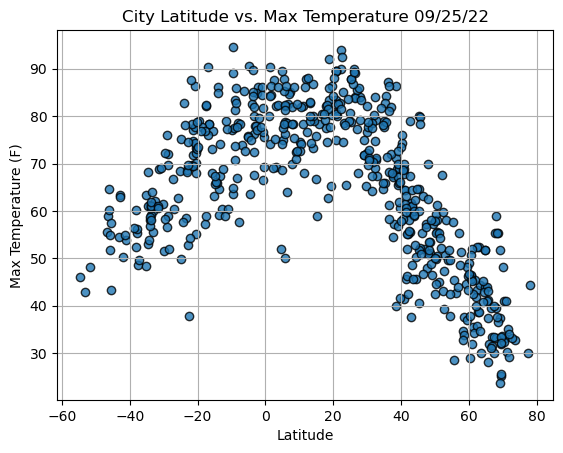

In [16]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

## Plot Latitude vs. Humidity

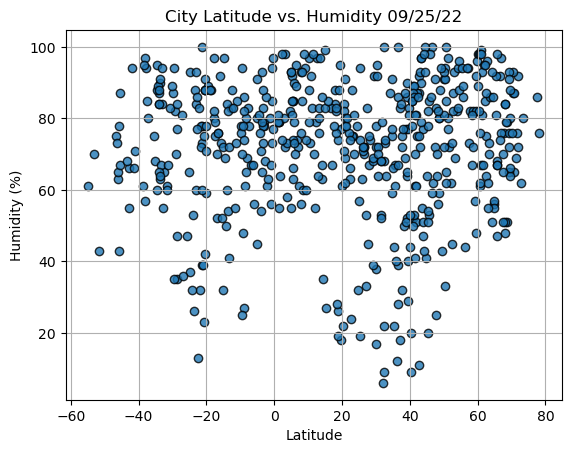

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

## Plot Latitude vs. Cloudiness

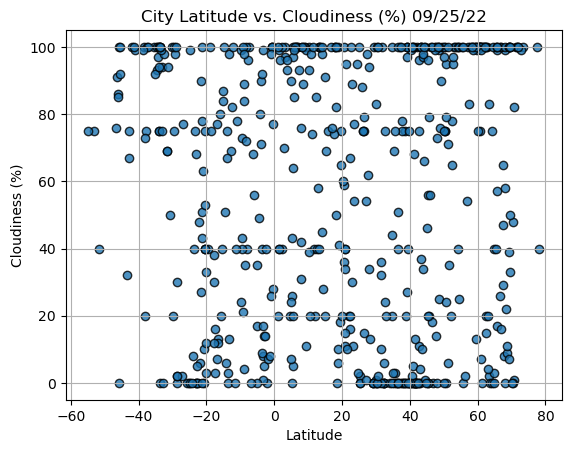

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

## Plot Latitude vs. Wind Speed

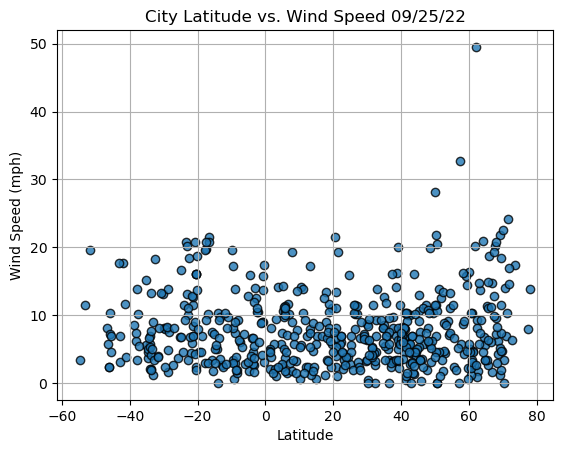

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

## Create a Linear Regression Function

In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

## Create Northern & Sounthern Hemisphere DataFrames

In [21]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Victoria,HK,2022-09-26 03:20:39,22.2855,114.1577,89.96,63,16,5.99
1,Ostrovnoy,RU,2022-09-26 03:26:18,68.0531,39.5131,39.61,84,99,9.51
3,Qaanaaq,GL,2022-09-26 03:26:18,77.4840,-69.3632,30.07,86,100,7.94
4,Nuevo Progreso,MX,2022-09-26 03:26:19,23.1667,-97.9500,78.48,75,11,3.42
5,Kihei,US,2022-09-26 03:22:07,20.7850,-156.4656,89.62,69,40,8.05


In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

## Perform Linear Regression on the Maximum Temperature for the Northern Hemisphere

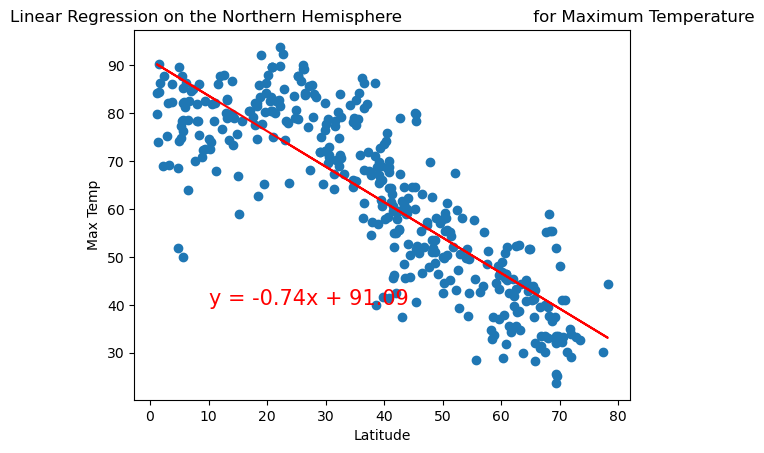

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

## Perform Linear Regression on the Maximum Temperature for the Southern Hemisphere

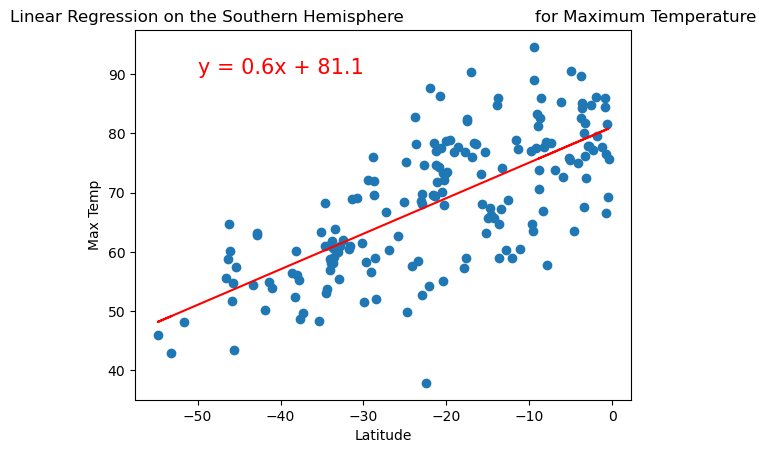

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

## Find the Correlation Between Latitude and Percent Humidity

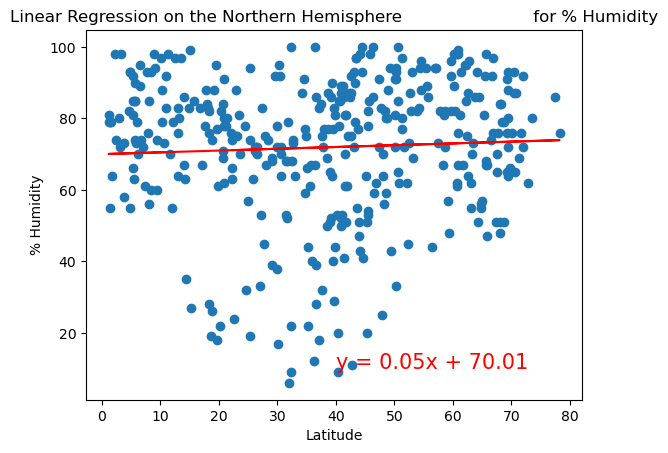

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

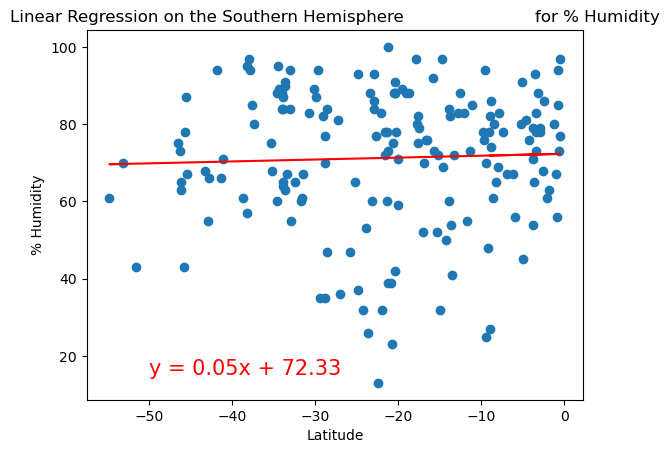

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity' ,(-50,15))


## Find the Correlation Between Latitude and Percent Cloudiness

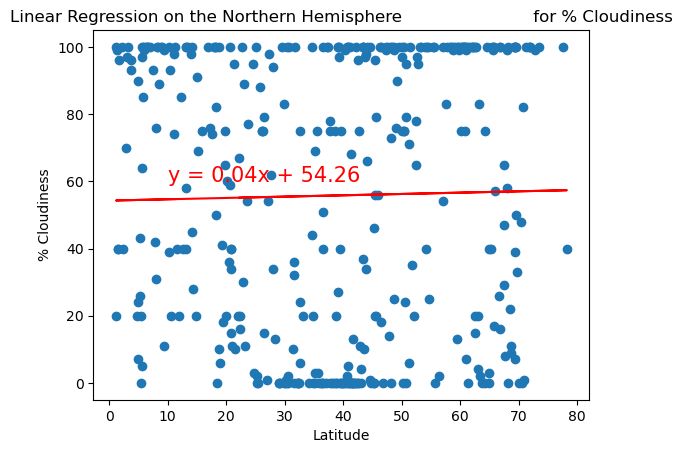

In [40]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,60))

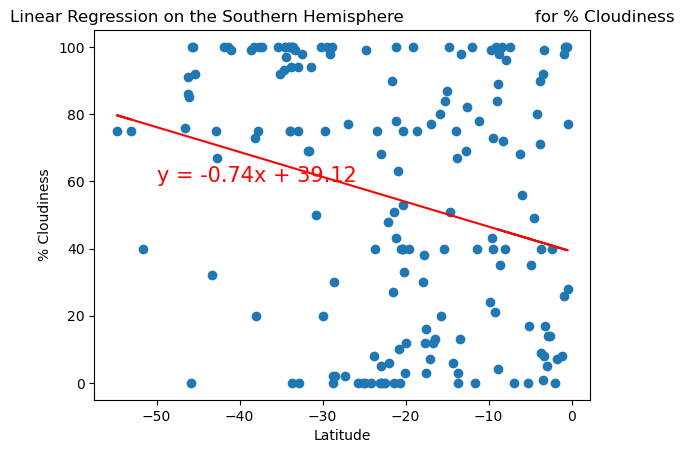

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

## Find the Correlation Between Latitude and Wind Speed

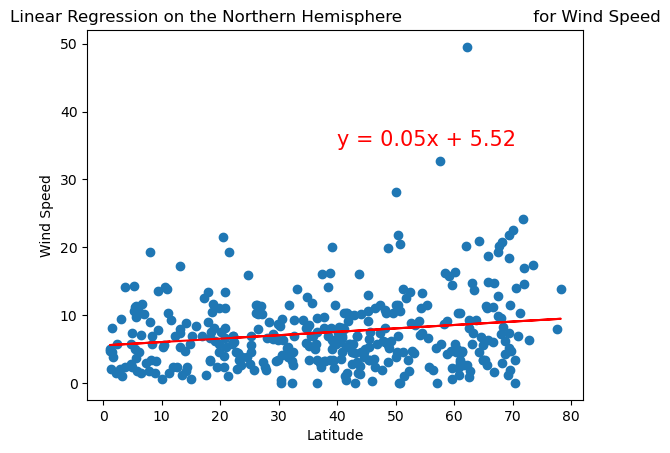

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

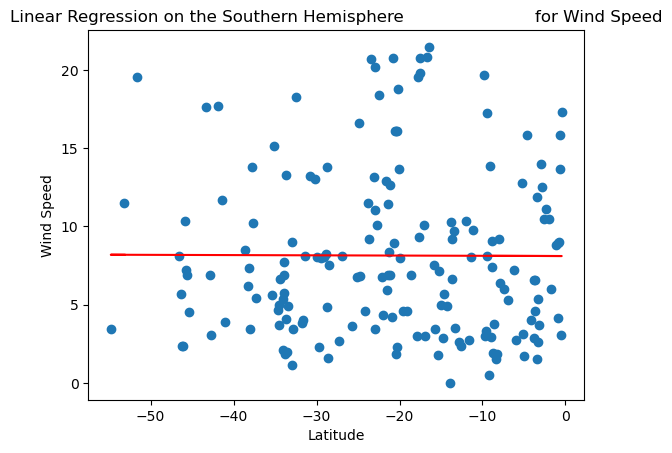

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))